<a href="https://colab.research.google.com/github/auliakharis/EconomicClustering/blob/main/PAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC, SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime

import json
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, train_test_split
from sklearn.linear_model import Ridge, RidgeCV
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import altair as alt
from IPython.display import HTML
from sklearn.linear_model import LinearRegression

from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
from sklearn.kernel_ridge import KernelRidge

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df.head()

,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,A.7,B.1,B.2,B.3,B.4,C.1,C.2,C.3,C.4,C.5,C.6,C.7,C.8,C.9,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,D.1,D.2,D.3,D.4,E.1,E.2,E.3,E.4,E.5,F.1,F.2,G.1,G.2,G.3,G.4,G.5,G.6,G.7,G.8
0,1,2,26,3,4,2,2,3,400,3,1,1,3,3,3,2,2,4,4,1,1,4,4,1,4,4,4,1,1,0,NaN,1,1.0,4,2,0,0,1,0,2,2,0,2,2,0,0,1,0
1,2,1,51,1,3,1,2,4,667,3,5,5,4,4,4,3,1,4,4,4,4,4,3,4,4,4,1,4,1,0,NaN,1,1.0,4,2,1,0,1,1,4,1,0,1,3,1,0,5,0
2,3,1,48,2,5,2,1,4,200,3,2,2,4,3,4,3,2,4,4,4,1,4,4,4,1,4,4,4,1,1,4.0,0,NaN,4,4,1,1,1,0,4,1,0,2,3,1,0,5,0
3,4,2,27,3,4,2,1,3,260,0,5,4,4,3,3,1,3,4,4,1,2,3,3,4,2,1,1,4,1,0,NaN,0,NaN,2,4,1,0,0,0,4,1,0,1,3,1,0,5,0
4,5,2,20,3,3,1,1,3,400,5,1,3,4,4,4,3,3,1,2,4,4,3,4,1,4,1,1,4,4,0,NaN,0,NaN,3,1,1,1,1,0,4,2,1,1,3,1,1,4,0


In [ ]:
df = pd.get_dummies(df, columns=['A.3','A.6','C.1','E.1'])


In [ ]:
df.head()

,No. Responden,A.1,A.2,A.4,A.5,A.7,B.1,B.2,B.3,B.4,C.2,C.3,C.4,C.5,C.6,C.7,C.8,C.9,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,D.1,D.2,D.3,D.4,E.2,E.3,E.4,E.5,F.1,F.2,G.1,G.2,G.3,G.4,G.5,G.6,G.7,G.8,A.3_1,A.3_2,A.3_3,A.3_4,A.3_5,A.6_1,A.6_2,A.6_3,A.6_4,A.6_5,C.1_1,C.1_2,C.1_3,C.1_4,E.1_1,E.1_2,E.1_3,E.1_4
0,1,2,26,4,2,3,400,3,1,1,3,3,2,2,4,4,1,1,4,4,1,4,4,4,1,1,0,NaN,1,1.0,2,0,0,1,0,2,2,0,2,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,2,1,51,3,1,4,667,3,5,5,4,4,3,1,4,4,4,4,4,3,4,4,4,1,4,1,0,NaN,1,1.0,2,1,0,1,1,4,1,0,1,3,1,0,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3,1,48,5,2,4,200,3,2,2,3,4,3,2,4,4,4,1,4,4,4,1,4,4,4,1,1,4.0,0,NaN,4,1,1,1,0,4,1,0,2,3,1,0,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,4,2,27,4,2,3,260,0,5,4,3,3,1,3,4,4,1,2,3,3,4,2,1,1,4,1,0,NaN,0,NaN,4,1,0,0,0,4,1,0,1,3,1,0,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,5,2,20,3,1,3,400,5,1,3,4,4,3,3,1,2,4,4,3,4,1,4,1,1,4,4,0,NaN,0,NaN,1,1,1,1,0,4,2,1,1,3,1,1,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df = df.fillna(0)

In [ ]:
df.head()

,No. Responden,A.1,A.2,A.4,A.5,A.7,B.1,B.2,B.3,B.4,C.2,C.3,C.4,C.5,C.6,C.7,C.8,C.9,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,D.1,D.2,D.3,D.4,E.2,E.3,E.4,E.5,F.1,F.2,G.1,G.2,G.3,G.4,G.5,G.6,G.7,G.8,A.3_1,A.3_2,A.3_3,A.3_4,A.3_5,A.6_1,A.6_2,A.6_3,A.6_4,A.6_5,C.1_1,C.1_2,C.1_3,C.1_4,E.1_1,E.1_2,E.1_3,E.1_4
0,1,2,26,4,2,3,400,3,1,1,3,3,2,2,4,4,1,1,4,4,1,4,4,4,1,1,0,0.0,1,1.0,2,0,0,1,0,2,2,0,2,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,2,1,51,3,1,4,667,3,5,5,4,4,3,1,4,4,4,4,4,3,4,4,4,1,4,1,0,0.0,1,1.0,2,1,0,1,1,4,1,0,1,3,1,0,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3,1,48,5,2,4,200,3,2,2,3,4,3,2,4,4,4,1,4,4,4,1,4,4,4,1,1,4.0,0,0.0,4,1,1,1,0,4,1,0,2,3,1,0,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,4,2,27,4,2,3,260,0,5,4,3,3,1,3,4,4,1,2,3,3,4,2,1,1,4,1,0,0.0,0,0.0,4,1,0,0,0,4,1,0,1,3,1,0,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,5,2,20,3,1,3,400,5,1,3,4,4,3,3,1,2,4,4,3,4,1,4,1,1,4,4,0,0.0,0,0.0,1,1,1,1,0,4,2,1,1,3,1,1,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df = df.drop(columns='No. Responden',axis=1)

                     A.1  ...              E.1_4
A.1    1.000000000000000  ...  0.002260386484953
A.2   -0.065695679600404  ...  0.129045409063977
A.4   -0.048051857501259  ... -0.016542296332488
A.5   -0.096719657550180  ... -0.051032663872818
A.7   -0.082355491675571  ...  0.123555744551778
...                  ...  ...                ...
C.1_4 -0.037008853806330  ...  0.075601084334586
E.1_1  0.023973373902204  ... -0.490771574905363
E.1_2  0.011038826606611  ... -0.550209195424936
E.1_3 -0.055842355512039  ... -0.300960973547706
E.1_4  0.002260386484953  ...  1.000000000000000

[61 rows x 61 columns]


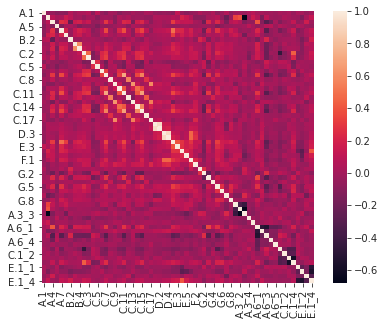

In [ ]:
cor = df.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(cor, vmax=1, square=True)
print(cor)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scale_X = StandardScaler()

X = Scale_X.fit_transform(df)

In [ ]:
X

array([[ 0.82673765, -0.52256403,  0.36115851, ..., -0.53333333,
        -0.29172998,  0.96932828],
       [-1.20957355,  1.63982149, -0.78581741, ..., -0.53333333,
        -0.29172998,  0.96932828],
       [-1.20957355,  1.38033523,  1.50813443, ..., -0.53333333,
        -0.29172998,  0.96932828],
       ...,
       [-1.20957355, -1.12803198, -0.78581741, ..., -0.53333333,
        -0.29172998,  0.96932828],
       [-1.20957355, -1.12803198, -0.78581741, ..., -0.53333333,
        -0.29172998,  0.96932828],
       [-1.20957355, -0.26307777,  0.36115851, ..., -0.53333333,
         3.4278273 , -1.03164224]])

In [ ]:
knn.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#Keknya juga perlu belajar uji reabilitas sama validitas

In [ ]:
result = knn.predict(X)

In [ ]:
df['kluster'] = pd.DataFrame(result)

In [ ]:
df.head()

,A.1,A.2,A.4,A.5,A.7,B.1,B.2,B.3,B.4,C.2,C.3,C.4,C.5,C.6,C.7,C.8,C.9,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,D.1,D.2,D.3,D.4,E.2,E.3,E.4,E.5,F.1,F.2,G.1,G.2,G.3,G.4,G.5,G.6,G.7,G.8,A.3_1,A.3_2,A.3_3,A.3_4,A.3_5,A.6_1,A.6_2,A.6_3,A.6_4,A.6_5,C.1_1,C.1_2,C.1_3,C.1_4,E.1_1,E.1_2,E.1_3,E.1_4,kluster
0,2,26,4,2,3,400,3,1,1,3,3,2,2,4,4,1,1,4,4,1,4,4,4,1,1,0,0.0,1,1.0,2,0,0,1,0,2,2,0,2,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
1,1,51,3,1,4,667,3,5,5,4,4,3,1,4,4,4,4,4,3,4,4,4,1,4,1,0,0.0,1,1.0,2,1,0,1,1,4,1,0,1,3,1,0,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
2,1,48,5,2,4,200,3,2,2,3,4,3,2,4,4,4,1,4,4,4,1,4,4,4,1,1,4.0,0,0.0,4,1,1,1,0,4,1,0,2,3,1,0,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
3,2,27,4,2,3,260,0,5,4,3,3,1,3,4,4,1,2,3,3,4,2,1,1,4,1,0,0.0,0,0.0,4,1,0,0,0,4,1,0,1,3,1,0,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
4,2,20,3,1,3,400,5,1,3,4,4,3,3,1,2,4,4,3,4,1,4,1,1,4,4,0,0.0,0,0.0,1,1,1,1,0,4,2,1,1,3,1,1,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df['kluster'].value_counts()

1    464
0    403
Name: kluster, dtype: int64

In [ ]:
df[df['kluster']==1].describe()

,A.1,A.2,A.4,A.5,A.7,B.1,B.2,B.3,B.4,C.2,C.3,C.4,C.5,C.6,C.7,C.8,C.9,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,D.1,D.2,D.3,D.4,E.2,E.3,E.4,E.5,F.1,F.2,G.1,G.2,G.3,G.4,G.5,G.6,G.7,G.8,A.3_1,A.3_2,A.3_3,A.3_4,A.3_5,A.6_1,A.6_2,A.6_3,A.6_4,A.6_5,C.1_1,C.1_2,C.1_3,C.1_4,E.1_1,E.1_2,E.1_3,E.1_4,kluster
count,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.0,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.000000000000000,464.0
mean,1.564655172413793,32.355603448275865,3.967672413793104,1.700431034482759,2.915948275862069,370.965517241379303,3.797413793103448,2.484913793103448,2.853448275862069,3.094827586206896,3.327586206896552,1.969827586206897,1.872844827586207,3.484913793103448,3.413793103448276,2.551724137931035,1.933189655172414,3.420258620689655,3.269396551724138,2.838362068965517,2.066810344827586,3.368534482758621,3.193965517241379,3.202586206896552,1.855603448275862,0.318965517241379,0.943965517241379,0.250000000000000,0.698275862068966,2.898706896551724,0.668103448275862,0.558189655172414,0.896551724137931,0.459051724137931,2.573275862068965,1.976293103448276,0.310344827586207,1.530172413793103,2.510775862068965,0.788793103448276,0.379310344827586,3.325431034482758,0.370689655172414,0.232758620689655,0.338362068965517,0.413793103448276,0.0,0.015086206896552,0.726293103448276,0.200431034482759,0.030172413793103,0.008620689655172,0.034482758620690,0.060344827586207,0.066810344827586,0.383620689655172,0.489224137931034,0.127155172413793,0.178879310344828,0.103448275862069,0.590517241379310,1.0
std,0.496337220825360,11.047348071780887,0.847452141537397,0.490426520836012,0.992109238087926,346.804952147873735,1.880304244803880,1.236498921222798,1.173901290236739,0.673194868444810,0.616908786155369,0.636502298026381,0.594244978657806,0.774728262193464,0.671145058301697,1.088679844024601,1.154322217809110,0.776336816760144,0.754146823927491,1.106506532577140,1.216276297996345,0.833919941991260,0.808356869323209,1.082909544285780,1.160291010486665,0.466578704821868,1.475899332996994,0.433480065980654,1.304385873462723,1.267843890188199,0.471402326492147,0.497138418935551,0.304872181405359,0.498858270446327,1.079465331104972,0.975664168908695,0.665909055380676,0.529022870007656,0.689235530889325,0.408605393342443,0.485739131540824,1.782964693073128,0.483510782399122,0.423045803129394,0.473663072907191,0.493043889279434,0.0,0.122027477624101,0.446341558086420,0.400754994264412,0.171246139190586,0.092546377858968,0.182662548469958,0.238381624215637,0.249962758825952,0.486792111600615,0.500423407528776,0.333506291862461,0.383664881559509,0.304872181405357,0.492269123093156,0.0
min,1.000000000000000,18.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,67.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,

In [ ]:
df[df['kluster']==0].describe()

,A.1,A.2,A.4,A.5,A.7,B.1,B.2,B.3,B.4,C.2,C.3,C.4,C.5,C.6,C.7,C.8,C.9,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,D.1,D.2,D.3,D.4,E.2,E.3,E.4,E.5,F.1,F.2,G.1,G.2,G.3,G.4,G.5,G.6,G.7,G.8,A.3_1,A.3_2,A.3_3,A.3_4,A.3_5,A.6_1,A.6_2,A.6_3,A.6_4,A.6_5,C.1_1,C.1_2,C.1_3,C.1_4,E.1_1,E.1_2,E.1_3,E.1_4,kluster
count,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.00000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.000000000000000,403.0
mean,1.627791563275434,31.679900744416873,3.359801488833747,1.791563275434243,1.928039702233251,257.009925558312659,4.141439205955335,2.024813895781638,2.310173697270471,2.535980148883375,2.821339950372209,2.260545905707196,2.059553349875931,2.955334987593052,2.163771712158809,2.419354838709677,2.057071960297767,2.749379652605459,2.086848635235732,2.535980148883375,2.220843672456576,2.476426799007444,1.957816377171216,2.982630272952854,1.853598014888338,0.233250620347395,0.590570719602978,0.089330024813896,0.193548387096774,1.667493796526055,0.292803970223325,0.320099255583127,0.754342431761787,0.136476426799007,2.052109181141439,1.890818858560794,0.910669975186104,1.156327543424318,2.513647642679901,0.352357320099256,0.193548387096774,3.161290322580645,0.200992555831266,0.138957816377171,0.349875930521092,0.481389578163772,0.012406947890819,0.017369727047146,0.32258064516129,0.126550868486352,0.387096774193548,0.091811414392060,0.071960297766749,0.253101736972705,0.178660049627792,0.364764267990074,0.203473945409429,0.250620347394541,0.270471464019851,0.049627791563275,0.429280397022333,0.0
std,0.483994404215306,12.143596391656693,0.783582765599806,0.504929223000600,0.879440617332878,237.212239708256647,1.951487482965370,1.165157368828255,1.113271687572811,0.785801058212282,0.738319451864834,0.585145047079144,0.582862040466148,0.939985219764020,0.877001714625755,1.083720595448920,1.177829339301869,1.011977209683244,0.834517016699521,1.106548000412498,1.198407850440917,1.065662681957965,0.822994892489896,1.151333222326410,1.099934736732448,0.423426092652153,1.177572518638643,0.285574044848779,0.692718392034464,0.871671592408043,0.455614863961664,0.467094320830047,0.431011481719654,0.343720485937151,0.989881277362948,0.932012253267351,1.030365002112773,0.383591838310694,0.706534774779898,0.478298342920569,0.395570077338644,1.694677157819291,0.401240622641675,0.346332462863404,0.477523393703017,0.500274605776315,0.110830932834655,0.130807023472466,0.46804482746846,0.332882427764546,0.487691544780371,0.289118482088759,0.258743381989365,0.435329185300147,0.383543560437705,0.481962335715568,0.403082452944442,0.433908950582837,0.444755538033573,0.217444704292178,0.495588728030699,0.0
min,1.000000000000000,18.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,50.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.0000000000000

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
for i,k in enumerate([2,3,4,5,6,7,8,9,10]):
  kmeans = KMeans(n_clusters = k, random_state=42)
  labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, labels)
  print("For n_clusters =", k,
  "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.06942460497585658
For n_clusters = 3 The average silhouette_score is : 0.04959899704917355
For n_clusters = 4 The average silhouette_score is : 0.04579021295401103
For n_clusters = 5 The average silhouette_score is : 0.04606179202476969
For n_clusters = 6 The average silhouette_score is : 0.04583106945597455
For n_clusters = 7 The average silhouette_score is : 0.048352877579046626
For n_clusters = 8 The average silhouette_score is : 0.04270838017450509
For n_clusters = 9 The average silhouette_score is : 0.04665717755764106
For n_clusters = 10 The average silhouette_score is : 0.04314866275285905


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2).fit(X)
agglomerative_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = df.sample(frac=.05)

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=2).fit(sample_df)
sample_agglomerative_clustering


linked = linkage(sample_agglomerative_clustering.children_, 'single')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final.csv',delimiter=";")
data.head()

In [ ]:
df_AgeClus = pd.crosstab(data['A.4'],data['kluster'])
df_AgeClus.plot(kind = 'bar',stacked = True, color  = ['silver', 'gold'])

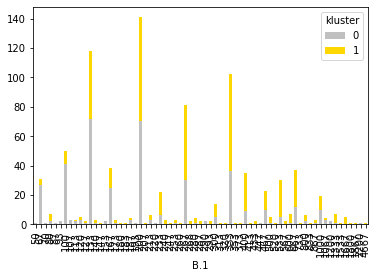

In [ ]:
df_SourClus = pd.crosstab(df['B.1'],df['kluster'])
df_SourClus.plot(kind = 'bar',stacked = True, color  = ['silver', 'gold'])

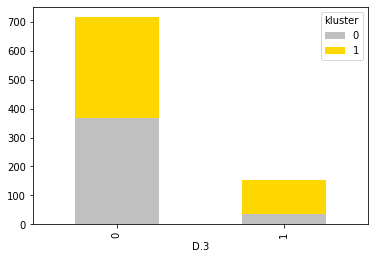

In [ ]:
df_SClus = pd.crosstab(data['D.3'],data['kluster'])
df_SClus.plot(kind = 'bar',stacked = True, color  = ['silver', 'gold'])

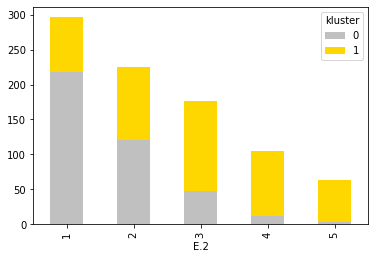

In [ ]:
df_hClus = pd.crosstab(data['E.2'],data['kluster'])
df_hClus.plot(kind = 'bar',stacked = True, color  = ['silver', 'gold'])

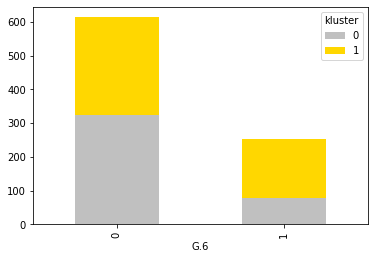

In [ ]:
df_qClus = pd.crosstab(data['G.6'],data['kluster'])
df_qClus.plot(kind = 'bar',stacked = True, color  = ['silver', 'gold'])

In [ ]:
df.to_csv("hasil.csv")

In [ ]:
df['A.2'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['A.2'] >= 18) & (col['A.2'] <= 35), 'A.2'] = 'Young Adult'
    col.loc[(col['A.2'] > 35) & (col['A.2'] <= 55), 'A.2'] = 'Senior Adult'
    col.loc[col['A.2'] > 55, 'A.2'] = 'Elder'
    
    
labels = df["A.2"].unique().tolist()
amount = df["A.2"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')